# Data Mining

## Tugas 4: Bayesian Statistics

### Mekanisme

Anda hanya diwajibkan untuk mengumpulkan file ini saja ke uploader yang disediakan di http://elearning.uai.ac.id/. Ganti nama file ini saat pengumpulan menjadi **tugas4_NIM.ipynb**.

**Keterlambatan**: Pengumpulan tugas yang melebihi tenggat yang telah ditentukan tidak akan diterima. Keterlambatan akan berakibat pada nilai nol untuk tugas ini.

**Kolaborasi**: Anda diperbolehkan untuk berdiskusi dengan teman Anda, tetapi *dilarang keras* menyalin kode maupun tulisan dari teman Anda.

### Petunjuk

Terdapat beberapa *packages* yang Anda akan gunakan dalam mengerjakan tugas ini, yaitu:

- matplotlib
- numpy
- pandas
- pymc3
- scipy
- seaborn
- scikit-learn

Anda diperbolehkan (jika dirasa perlu) untuk mengimpor modul tambahan untuk tugas ini, kecuali dijelaskan sebaliknya. Namun, seharusnya modul yang tersedia sudah cukup untuk memenuhi kebutuhan Anda.

Pastikan jawaban Anda singkat, padat, dan jelas. Mayoritas pertanyaan yang diberikan dapat dijawab dalam 3-4 kalimat saja.

### Import

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc3 as pm
import seaborn as sns
%matplotlib inline

RANDOM_STATE = 1945
plt.style.use('bmh')

## 1. Memodelkan Kemampuan Petinju (15 poin)

Dua orang petinju, MP dan ODLH, akan bertemu satu masing-masing dalam sebuah pertandingan amal. MP telah bertanding 70 kali dan memenangkan 61 pertandingan, sedangkan ODLH menang 39 kali dari 45 pertandingannya. Asumsikan bahwa Anda tidak tahu apapun tentang kemampuan kedua petinju ini awalnya, lalu Anda ingin memodelkan peluang MP akan menang dari ODLH.

### Soal 1.1 (2 poin)

Jika Anda memodelkan kemampuan (skill) MP dan ODLH sebagai distribusi beta, berapa nilai parameter dari masing-masing model?

In [0]:
from scipy.stats import beta

In [3]:
data = [['mp', 70, 61], ['odlh', 45, 39]] 
  
# Create the pandas DataFrame 
df = pd.DataFrame(data, columns = ['name', 'game', 'win']) 

df['win/game'] = df['win']/df['game']
df['alpha'] = df['game'] + 1
df['beta'] = (df['game'] - df['win']) + 1

amp = df.loc[df['name']=='mp','alpha']
bmp = df.loc[df['name']=='mp','beta']
aodlh = df.loc[df['name']=='odlh','alpha']
bodlh = df.loc[df['name']=='odlh','beta']

df

,name,game,win,win/game,alpha,beta
0,mp,70,61,0.871429,71,10
1,odlh,45,39,0.866667,46,7


### Soal 1.2 (2 poin)

Gambarkan distribusi dari "skill" kedua petinju.

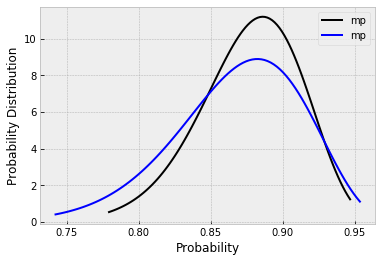

In [4]:
xa = np.linspace(beta.ppf(0.01, amp, bmp), beta.ppf(0.99, amp, bmp), 100)
xb = np.linspace(beta.ppf(0.01, aodlh, bodlh), beta.ppf(0.99, aodlh, bodlh), 100)
fig, ax = plt.subplots(1,1)
ax.plot(xa, beta.pdf(xa,amp,bmp),'k-', label='mp')
ax.plot(xb, beta.pdf(xb,aodlh,bodlh),'b-', label='mp')
plt.xlabel('Probability')
plt.ylabel('Probability Distribution')
plt.legend()
plt.show()

### Soal 1.3.a (4 poin)

Berapa nilai ekspektasi dan variansi dari kedua model?

In [0]:
meanbmp, varbmp, skewbmp, kurtbmp = beta.stats(amp, bmp, moments='mvsk')
meanodlh, varodlh, skewodlh, kurtodlh = beta.stats(aodlh, bodlh, moments='mvsk')

In [6]:
print('Nilai ekpektasi untuk Petinju MP : ' + str(meanbmp))
print('Variansi untuk Petinju MP : ' + str(varbmp))
print('Nilai ekpektasi untuk Petinju ODLH : ' + str(meanodlh))
print('Variansi untuk Petinju ODLH : ' + str(varodlh))

Nilai ekpektasi untuk Petinju MP : [0.87654321]
Variansi untuk Petinju MP : [0.0013197]
Nilai ekpektasi untuk Petinju ODLH : [0.86792453]
Variansi untuk Petinju ODLH : [0.00212281]


### Soal 1.3.b (2 poin)

Berdasarkan ekspektasi tersebut, siapa petinju yang lebih baik?

*Berdasarkan ekspektasi tersebut, diketahui bahwa petinju MP lebih baik dibandingkan ODLH, karena nilai ekpektasinya lebih besar, serta variansinya lebih kecil dibandingkan dengan petinju ODLH.*

### Soal 1.4 (5 poin)

Hitunglah peluang PM akan menang melawan ODLH.

In [7]:
print("Peluang MP akan menang melawan ODLH adalah " + str(df.loc[df['name']=='mp','win'].values / (df.loc[df['name']=='mp','win'].values + df.loc[df['name']=='odlh','win'].values)))

Peluang MP akan menang melawan ODLH adalah [0.61]


https://stats.stackexchange.com/questions/318527/estimating-win-probability-from-score-in-best-of-series

## 2. Perbandingan Tinggi Badan (5 poin)

Asumsikan ada dua kelompok orang yang ingin Anda bandingkan tinggi badannya seperti pada contoh kode di bawah ini.

In [8]:
pip install git+git://github.com/arviz-devs/arviz.git

  Cloning git://github.com/arviz-devs/arviz.git to /tmp/pip-req-build-w1o49s1g
  Running command git clone -q git://github.com/arviz-devs/arviz.git /tmp/pip-req-build-w1o49s1g
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for arviz: filename=arviz-0.6.1-cp36-none-any.whl size=2588979 sha256=cfed3a691b686723781a7e3110efae396227dd0827e84cdf22147109314f74f4
  Stored in directory: /tmp/pip-ephem-wheel-cache-bz83hv_g/wheels/a5/04/05/bff2d46cd1c6506f627675722c196cfb3f657296e6e3bfaf57
Successfully built arviz


In [9]:
pip install git+https://github.com/pymc-devs/pymc3

  Cloning https://github.com/pymc-devs/pymc3 to /tmp/pip-req-build-8frmnil3
  Running command git clone -q https://github.com/pymc-devs/pymc3 /tmp/pip-req-build-8frmnil3
  Created wheel for pymc3: filename=pymc3-3.8-cp36-none-any.whl size=35943417 sha256=01fd9f1fd98a512196a68250ee389ac4aef82bec3fe5e07a0e6762e13a713966
  Stored in directory: /tmp/pip-ephem-wheel-cache-p3cxz9id/wheels/a1/e3/71/a696f2af0dd40bccc0ce672d616d21cc9dd90dbdd3f03242f4
Successfully built pymc3


In [0]:
from scipy.stats import norm

np.random.seed(42)

height_a = [
    170., 164., 171., 180., 163., 163., 181., 173., 160., 170., 160.,
    160., 167., 146., 148., 159., 155., 168., 156., 151.
]
height_b = [
    150., 153., 144., 143., 163., 169., 154., 165., 159., 149., 159.,
    170., 155., 171., 129., 163., 156., 152., 156., 135., 153., 159.,
    170., 150., 147., 150., 164., 158., 150., 160., 156., 165., 148.,
    152., 151., 140., 158., 158., 155., 153.
]

Buatlah model Bayesian dari selisih antara rata-rata tinggi badan kelompok A dan kelompok B. Gambarkan trace plot dan posterior plotnya.

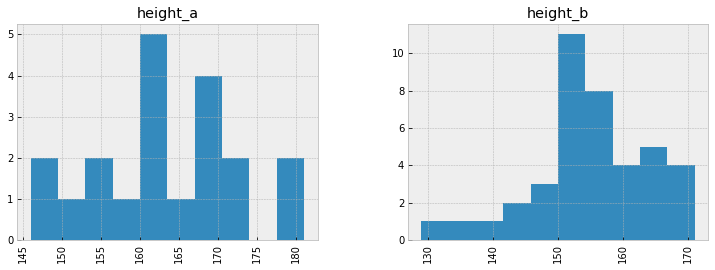

In [11]:
y1 = np.array(height_a)
y2 = np.array(height_b)
y = pd.DataFrame(dict(value=np.r_[y1, y2], group=np.r_[['height_a']*len(height_a), ['height_b']*len(height_b)]))

y.hist('value', by='group', figsize=(12, 4));

In [0]:
μ_m = y.value.mean()
μ_s = y.value.std() * 2

with pm.Model() as model:
    group1_mean = pm.Normal('group1_mean', mu=μ_m, sd=μ_s)
    group2_mean = pm.Normal('group2_mean', mu=μ_m, sd=μ_s)

In [0]:
σ_low = 0
σ_high = 1

with model:
    group1_std = pm.Uniform('group1_std', lower=σ_low, upper=σ_high)
    group2_std = pm.Uniform('group2_std', lower=σ_low, upper=σ_high)

In [0]:
with model:
    group1 = pm.Normal('group1', mu=group1_mean, sd=group1_std, observed=[10])
    group2 = pm.Normal('group2', mu=group2_mean, sd=group2_std, observed=[10])

In [0]:
with model:
    diff_of_means = pm.Deterministic('difference of means', group1_mean - group2_mean)
    diff_of_stds = pm.Deterministic('difference of stds', group1_std - group2_std)

In [16]:
with model:
    trace = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [group2_std, group1_std, group2_mean, group1_mean]


There were 27 divergences after tuning. Increase `target_accept` or reparameterize.
There were 50 divergences after tuning. Increase `target_accept` or reparameterize.
The estimated number of effective samples is smaller than 200 for some parameters.


/usr/local/lib/python3.6/dist-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/usr/local/lib/python3.6/dist-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/usr/local/lib/python3.6/dist-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/usr/local/lib/python3.6/dist-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa2b3a87ba8>,
      dtype=object)

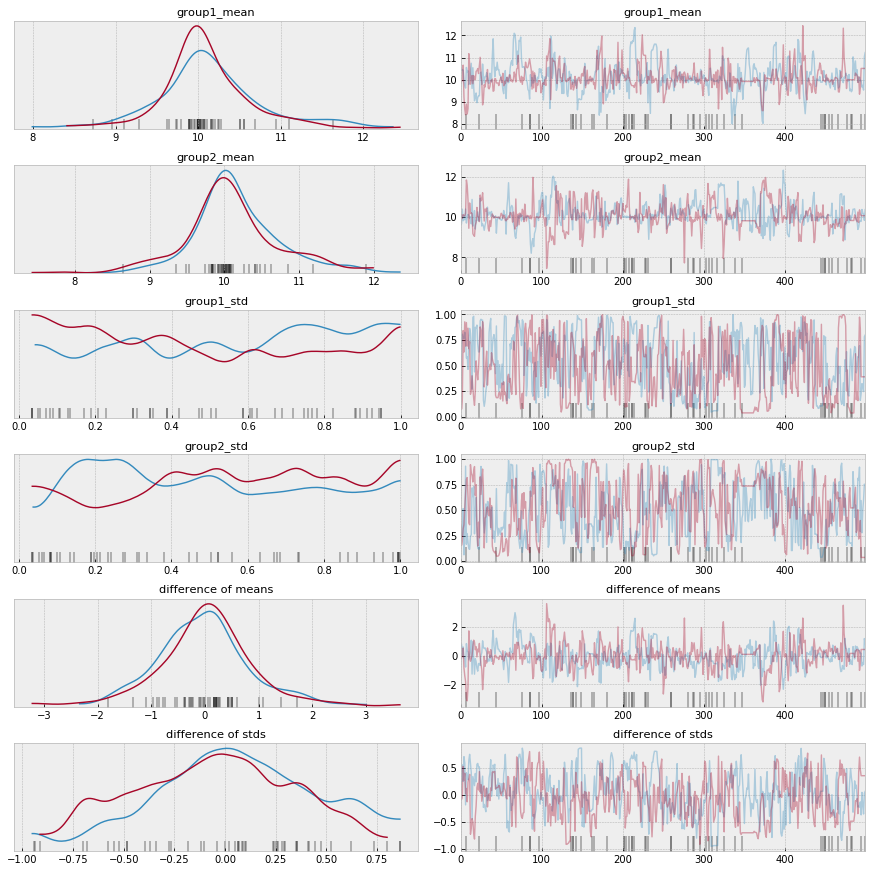

In [17]:
pm.traceplot(trace, figsize = (12, 12))

https://medium.com/@rnbrown/bayesian-estimation-with-pymc3-9906a5214618

https://docs.pymc.io/notebooks/BEST.html